In [7]:
import os
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model

BASE_DIR = r"C:/Users/raksh/x-ai_chest/data/chest_xray_multi"
TRAIN_DIR = os.path.join(BASE_DIR, "train")
VAL_DIR   = os.path.join(BASE_DIR, "val")
TEST_DIR  = os.path.join(BASE_DIR, "test")

IMG_SIZE = (224, 224)
BATCH_SIZE = 32


In [8]:
classes = os.listdir(TRAIN_DIR)
print("Classes:", classes)

for cls in classes:
    n_train = len(os.listdir(os.path.join(TRAIN_DIR, cls)))
    n_val   = len(os.listdir(os.path.join(VAL_DIR, cls)))
    n_test  = len(os.listdir(os.path.join(TEST_DIR, cls)))
    print(f"{cls}: train={n_train}, val={n_val}, test={n_test}")


Classes: ['COVID19', 'NORMAL', 'PNEUMONIA', 'TURBERCULOSIS']
COVID19: train=398, val=81, test=80
NORMAL: train=408, val=80, test=79
PNEUMONIA: train=408, val=86, test=84
TURBERCULOSIS: train=408, val=80, test=83


Found 1622 images belonging to 4 classes.


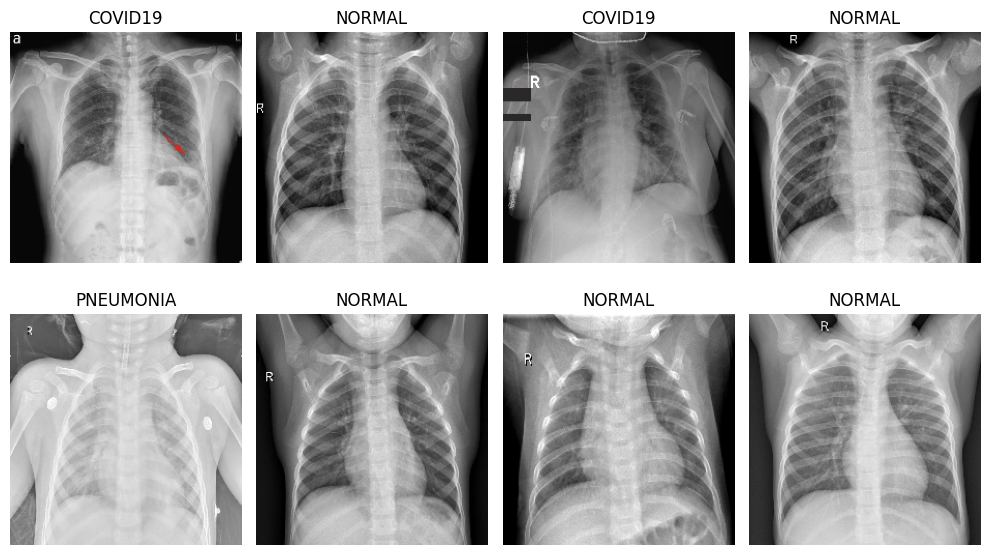

In [9]:
datagen = ImageDataGenerator(rescale=1./255)

train_gen = datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=IMG_SIZE,
    batch_size=8,
    class_mode="categorical"
)

imgs, labels = next(train_gen)

plt.figure(figsize=(10, 6))
for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.imshow(imgs[i])
    plt.axis("off")
    plt.title(list(train_gen.class_indices.keys())[np.argmax(labels[i])])
plt.tight_layout()
plt.show()


 Step 3: Notebook 2 – Model Training (Multi‑Disease)
 